In [73]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import datetime

/Users/guyanwu/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [74]:
data_set = pd.read_csv('/Users/guyanwu/Downloads/winequality-red.csv', sep=';')

In [75]:
data_set['quality_bin'] = data_set['quality'].apply(lambda x: 1 if x >= 6 else -1)
data_set['quality_mul'] = data_set['quality'] - 3

In [76]:
train_set = data_set.sample(frac=0.8, random_state=0)
test_set = data_set.drop(train_set.index)

In [77]:
train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin,quality_mul
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6,1,3
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5,-1,2
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7,1,4
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6,1,3
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,7.7,0.270,0.68,3.50,0.358,5.0,10.0,0.99720,3.25,1.08,9.9,7,1,4
932,7.6,0.400,0.29,1.90,0.078,29.0,66.0,0.99710,3.45,0.59,9.5,6,1,3
732,7.3,0.835,0.03,2.10,0.092,10.0,19.0,0.99660,3.39,0.47,9.6,5,-1,2
715,7.2,0.490,0.18,2.70,0.069,13.0,34.0,0.99670,3.29,0.48,9.2,6,1,3


In [5]:
def l_bin(x, y, w):
    z = np.dot(x, w)
    return np.log(1+np.exp(-y*z)).mean()

def l_bin_grad(x, y, w):
    z = np.dot(x, w)
    g = np.dot(-y * np.exp(-y*z) / (1+np.exp(-y*z)), x) / x.shape[0]
    return g

def l_mul(x, y, w):
    z = np.array([np.dot(x, w[i*11:(i+1)*11]) for i in range(6)])
    return (np.log(np.exp(z).sum(axis=0)) - z[y, np.arange(z.shape[1])]).mean()

def l_mul_grad(x, y, w):
    z = np.array([np.dot(x, w[i*11:(i+1)*11]) for i in range(6)])
    ez = np.exp(z).sum(axis=0)
    g = np.dot((np.exp(z) / ez), x)
    for i in range(6):
        g[i] -= x[y==i].sum(axis=0)
    return g.reshape(-1)

In [6]:
train_set_x = train_set.drop(['quality', 'quality_bin', 'quality_mul'], axis=1).values
train_set_y_bin = train_set['quality_bin'].values
train_set_y_mul = train_set['quality_mul'].values
test_set_x = test_set.drop(['quality', 'quality_bin', 'quality_mul'], axis=1).values
test_set_y_bin = test_set['quality_bin'].values
test_set_y_mul = test_set['quality_mul'].values

In [27]:
def cal_lg(x, y, w, type):
    if type == 'bin':
        return l_bin(x, y, w), l_bin_grad(x, y, w)
    elif type == 'mul':
        return l_mul(x, y, w), l_mul_grad(x, y, w)
    return 

# GD

In [88]:
# GD
w = np.zeros(11) #if type == 'bin' else np.zeros((1, 44*5))
w_list = []
g_list = []
l_list = []
predict_list = []
l_test = []
print(datetime.datetime.now())
for i in range(20000):
    for data_x, data_y in zip(train_set_x, train_set_y_bin):
        l, g = cal_lg(data_x, data_y, w, 'bin')
        w -= 1e-4 * g
        if np.linalg.norm(w) > 10:
            w = w /  np.linalg.norm(w) * 10
        w_list.append(w)
        g_list.append(g)
        l_list.append(l_bin(train_set_x, train_set_y_bin, w))
    if i % 20 == 0: print(i//20, end=' ')
    if i % 1000 == 999: print()
print('\n', datetime.datetime.now())

# 38min 20s

2023-05-02 14:53:28.926618
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 
50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 
150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 
200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 
250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 26

In [89]:
# np.save('result_save/wine_bin_GD_1e-3.npy', np.array(l_list))
# np.save('result_save/wine_bin_GD_1e-2.npy', np.array(l_list))
# np.save('result_save/wine_bin_GD_1e-4.npy', np.array(l_list))
l_gd3 = np.load('result_save/wine_bin_GD_1e-3.npy')
l_gd2 = np.load('result_save/wine_bin_GD_1e-2.npy')
l_gd4 = np.load('result_save/wine_bin_GD_1e-4.npy')

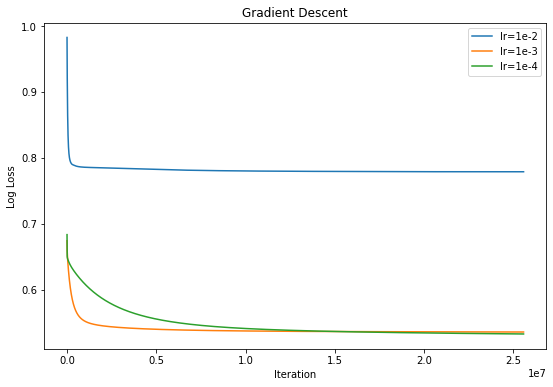

In [399]:
plt.figure(figsize=(9, 6))
plt.plot(np.array(range(len(np.array(l_gd2).reshape(-1, 1279).mean(axis=1))))*1279, np.array(l_gd2).reshape(-1, 1279).mean(axis=1))
plt.plot(np.array(range(len(np.array(l_gd3).reshape(-1, 1279).mean(axis=1))))*1279, np.array(l_gd3).reshape(-1, 1279).mean(axis=1))
plt.plot(np.array(range(len(np.array(l_gd4).reshape(-1, 1279).mean(axis=1))))*1279, np.array(l_gd4).reshape(-1, 1279).mean(axis=1))
plt.title('Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['lr=1e-2', 'lr=1e-3', 'lr=1e-4'])
# plt.show()
plt.savefig('result_save/wine_bin_GD.jpg', dpi=600)


# MBGD

In [87]:
# MBGD

w = np.zeros(11) #if type == 'bin' else np.zeros((1, 44*5))
w_list = []
g_list = []
l_list = []
predict_list = []
l_test = []
print(datetime.datetime.now())
for _ in range(1000000):
    rand_index = random.sample(range(train_set_x.shape[0]), 512)
    data_x = train_set_x[rand_index]
    data_y = train_set_y_bin[rand_index]
    #l, g = cal_lg(np.array([data_x]), np.array([data_y]), w, 'bin')
    l, g = cal_lg(np.array(data_x), np.array(data_y), w, 'bin')
    w = w - 1e-3 * g
    if np.linalg.norm(w) > 10:
        w = w / np.linalg.norm(w) * 10
    w_list.append(w)
    g_list.append(g)
    # l_list.append(l)
    l_list.append(l_bin(train_set_x, train_set_y_bin, w))
    

    if _ % 10000 == 9999: print(_ // 10000, end=' ')
    if _ % 500000 == 499999: print()
print(datetime.datetime.now())

# 16 time = 124-39 = 85s
# 32 time = 3600-57*60-19 = 85s
# 64 time = 05:31 - 02:20 = 190s
# 128 time = 11:32 - 07:20 = 250s
# 256 time = 19:20 - 13:09 = 371s
# 512 time = 30:16 - 20:47 = 569s

2023-05-02 10:20:47.178381
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 
50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
2023-05-02 10:30:16.486952


In [88]:
# np.save('result_save/wine_MBGD_32.npy', np.array(l_list))
# l32 = l_list.copy()
# np.save('result_save/wine_MBGD_64.npy', np.array(l_list))
# l64 = l_list.copy()
# np.save('result_save/wine_MBGD_128.npy', np.array(l_list))
# l128 = l_list.copy()
# np.save('result_save/wine_MBGD_256.npy', np.array(l_list))
# l256 = l_list.copy()
# np.save('result_save/wine_MBGD_512.npy', np.array(l_list))
# l512 = l_list.copy()

In [9]:
l16 = np.load('result_save/wine_MBGD_16.npy')
l32 = np.load('result_save/wine_MBGD_32.npy')
l64 = np.load('result_save/wine_MBGD_64.npy')
l128 = np.load('result_save/wine_MBGD_128.npy')
l256 = np.load('result_save/wine_MBGD_256.npy')
l512 = np.load('result_save/wine_MBGD_512.npy')


array([0.64420358, 0.61185672, 0.59259445, 0.57992512, 0.57199338,
       0.56626591, 0.56255128, 0.55932443, 0.55706966, 0.55559093,
       0.55449203, 0.5530547 , 0.55298615, 0.55150579, 0.55050896,
       0.55065416, 0.5496478 , 0.54931813, 0.54876909, 0.54871887,
       0.54817161, 0.54766945, 0.54754981, 0.54725856, 0.54765244,
       0.54678894, 0.54648062, 0.54625044, 0.54658023, 0.54585173,
       0.54611198, 0.54545531, 0.5456413 , 0.54574189, 0.54537311,
       0.54528185, 0.54493381, 0.54488019, 0.54519878, 0.54466078,
       0.54495512, 0.54438691, 0.54402601, 0.54369612, 0.54398633,
       0.54407331, 0.54367801, 0.54361506, 0.54425325, 0.5435733 ,
       0.54329924, 0.54302952, 0.54297479, 0.54309368, 0.5433769 ,
       0.54327675, 0.54304297, 0.5430669 , 0.54267624, 0.54253682,
       0.54277605, 0.54313252, 0.54244886, 0.54232227, 0.54242576,
       0.54203336, 0.54202549, 0.54216538, 0.54232732, 0.542654  ,
       0.54221868, 0.54171077, 0.54210173, 0.54159283, 0.54182

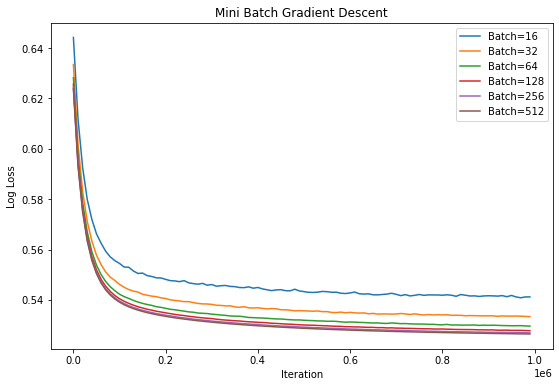

In [42]:
plt.figure(figsize=(9, 6))
# plt.plot(np.arange(len(l16[::10000]))*10000,l16[::10000])
# plt.plot(np.arange(len(l32[::10000]))*10000,l32[::10000])
# plt.plot(np.arange(len(l64[::10000]))*10000,l64[::10000])
# plt.plot(np.arange(len(l128[::10000]))*10000,l128[::10000])
# plt.plot(np.arange(len(l256[::10000]))*10000,l256[::10000])
# plt.plot(np.arange(len(l512[::10000]))*10000,l512[::10000])
plt.plot(np.arange(len(l16[::10000]))*10000,np.array(l16).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(len(l32[::10000]))*10000,np.array(l32).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(len(l64[::10000]))*10000,np.array(l64).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(len(l128[::10000]))*10000,np.array(l128).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(len(l256[::10000]))*10000,np.array(l256).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(len(l512[::10000]))*10000,np.array(l512).reshape(-1, 10000).mean(axis=1))

plt.title('Mini Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['Batch=16','Batch=32', 'Batch=64', 'Batch=128', 'Batch=256', 'Batch=512'])
# plt.show()
plt.savefig('result_save/wine_MBGD.jpg', dpi=600)

# SGDM

In [133]:
# SGDM

w = np.zeros(11) #if type == 'bin' else np.zeros((1, 44*5))
record_v = w.copy()
l_list = []
v_list = []
predict_list = []
print(datetime.datetime.now())
beta = 0.6
batch = 256
learning_rate = 1e-3
for _ in range(1000000):
    rand_index = random.sample(range(train_set_x.shape[0]), batch)
    data_x = train_set_x[rand_index]
    data_y = train_set_y_bin[rand_index]
    #l, g = cal_lg(np.array([data_x]), np.array([data_y]), w, 'bin')
    l, g = cal_lg(data_x, data_y, w, 'bin')
    v = beta * record_v + (1-beta) * g
    record_v = v.copy()
    w = w - learning_rate * v
    if np.linalg.norm(w) > 10:
        w = w / np.linalg.norm(w) * 10
    # l_list.append(l)
    l_list.append(l_bin(train_set_x, train_set_y_bin, w))

    if _ % 10000 == 9999: print(_ // 10000, end=' ')
    if _ % 500000 == 499999: print()
print(datetime.datetime.now())

# 0.95 time = 30:08 - 24:23 = 345s
# 0.9 time = 13:58 - 07:25 = 393s
# 0.8 time = 343s

2023-05-02 16:40:59.825962
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 
50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
2023-05-02 16:47:01.151786


In [134]:
# np.save('result_save/wine_bin_SGDM_256_09.npy', np.array(l_list))
# np.save('result_save/wine_bin_SGDM_256_095.npy', np.array(l_list))
# np.save('result_save/wine_bin_SGDM_256_08.npy', np.array(l_list))
# np.save('result_save/wine_bin_SGDM_256_06.npy', np.array(l_list))

l_sgdm_256_09 = np.load('result_save/wine_bin_SGDM_256_09.npy')
l_sgdm_256_095 = np.load('result_save/wine_bin_SGDM_256_095.npy')
l_sgdm_256_08 = np.load('result_save/wine_bin_SGDM_256_08.npy')
l_sgdm_256_06 = np.load('result_save/wine_bin_SGDM_256_06.npy')

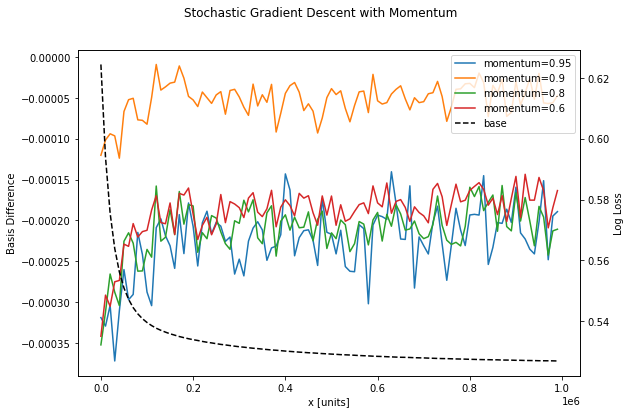

In [140]:
fig = plt.figure(figsize=(9, 6))

base = l256
x = np.arange(100)*10000
y1 = np.array(l_sgdm_256_095-base).reshape(-1, 10000).mean(axis=1)
y2 = np.array(l_sgdm_256_09-base).reshape(-1, 10000).mean(axis=1)
y3 = np.array(l_sgdm_256_08-base).reshape(-1, 10000).mean(axis=1)
y4 = np.array(l_sgdm_256_06-base).reshape(-1, 10000).mean(axis=1)
z = np.array(l256).reshape(-1, 10000).mean(axis=1)

# plt.plot(np.arange(len(l16[::10000]))*10000,np.array(l16).reshape(-1, 10000).mean(axis=1))

fig.suptitle('Stochastic Gradient Descent with Momentum')

ax = fig.add_subplot(111)
ax.plot(x, y1, label = 'momentum=0.95')
ax.plot(x, y2, label = 'momentum=0.9')
ax.plot(x, y3, label = 'momentum=0.8')
ax.plot(x, y4, label = 'momentum=0.6')

ax2 = ax.twinx()
ax2.plot(x ,z,  label = 'base', color='black', linestyle='--')
# fig.legend(loc=1)
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

ax.set_xlabel("x [units]")
ax.set_ylabel(r"Basis Difference")
ax2.set_ylabel(r"Log Loss")


plt.savefig('result_save/wine_bin_SGDM.jpg', dpi=600)


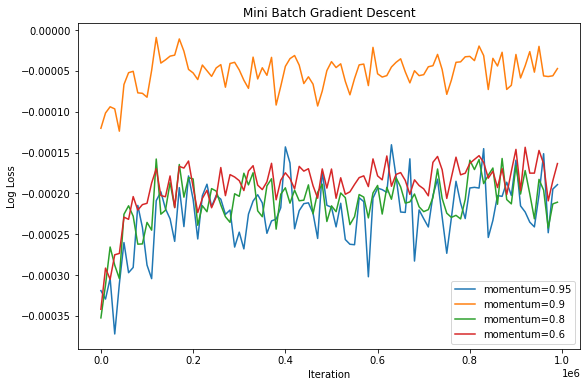

In [135]:
plt.figure(figsize=(9, 6))

base = l256
plt.plot(np.arange(100)*10000, np.array(l_sgdm_256_095-base).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(100)*10000, np.array(l_sgdm_256_09-base).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(100)*10000, np.array(l_sgdm_256_08-base).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(100)*10000, np.array(l_sgdm_256_06-base).reshape(-1, 10000).mean(axis=1))

# plt.plot(np.arange(len(l16[::10000]))*10000,np.array(l16).reshape(-1, 10000).mean(axis=1))

plt.title('Mini Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['momentum=0.95', 'momentum=0.9', 'momentum=0.8', 'momentum=0.6'])
# plt.show()
plt.savefig('result_save/wine_bin_SGDM.jpg', dpi=600)

In [113]:
# np.save('result_save/wine_bin_SGDM_16_09.npy', np.array(l_list))
# np.save('result_save/wine_bin_SGDM_32_09.npy', np.array(l_list))
# np.save('result_save/wine_bin_SGDM_64_09.npy', np.array(l_list))
# np.save('result_save/wine_bin_SGDM_128_09.npy', np.array(l_list))
np.save('result_save/wine_bin_SGDM_256_09.npy', np.array(l_list))
l_sgdm_16_09 = np.load('result_save/wine_bin_SGDM_16_09.npy')
l_sgdm_32_09 = np.load('result_save/wine_bin_SGDM_32_09.npy')
l_sgdm_64_09 = np.load('result_save/wine_bin_SGDM_64_09.npy')
l_sgdm_128_09 = np.load('result_save/wine_bin_SGDM_128_09.npy')
l_sgdm_256_09 = np.load('result_save/wine_bin_SGDM_256_09.npy')

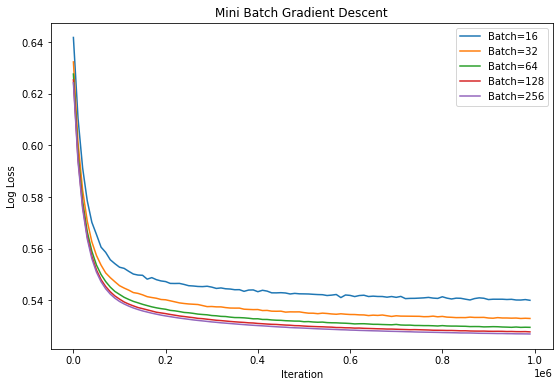

In [114]:
plt.figure(figsize=(9, 6))

plt.plot(np.arange(len(l_sgdm_16_09[::10000]))*10000,np.array(l_sgdm_16_09).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(len(l_sgdm_32_09[::10000]))*10000,np.array(l_sgdm_32_09).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(len(l_sgdm_64_09[::10000]))*10000,np.array(l_sgdm_64_09).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(len(l_sgdm_128_09[::10000]))*10000,np.array(l_sgdm_128_09).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(len(l_sgdm_256_09[::10000]))*10000,np.array(l_sgdm_256_09).reshape(-1, 10000).mean(axis=1))
# plt.plot(np.arange(len(l16[::10000]))*10000,np.array(l16).reshape(-1, 10000).mean(axis=1))

plt.title('Mini Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['Batch=16','Batch=32', 'Batch=64', 'Batch=128', 'Batch=256', 'Batch=512'])
# plt.show()
plt.savefig('result_save/wine_bin_SGDM.jpg', dpi=600)

# NAG

In [168]:
# NAG

w = np.zeros(11) #if type == 'bin' else np.zeros((1, 44*5))
record_v = w.copy()
l_list = []
v_list = []
predict_list = []
print(datetime.datetime.now())
beta = 0.6
batch = 256
learning_rate = 1e-3
for _ in range(100000):
    rand_index = random.sample(range(train_set_x.shape[0]), batch)
    data_x = train_set_x[rand_index]
    data_y = train_set_y_bin[rand_index]
    #l, g = cal_lg(np.array([data_x]), np.array([data_y]), w, 'bin')
    l, g = cal_lg(data_x, data_y, w - beta * record_v, 'bin')
    v = beta * record_v + learning_rate * g
    record_v = v.copy()
    w = w -  v
    if np.linalg.norm(w) > 10:
        w = w / np.linalg.norm(w) * 10
    # l_list.append(l)
    l_list.append(l_bin(train_set_x, train_set_y_bin, w))

    if _ % 10000 == 9999: print(_ // 10000, end=' ')
    if _ % 500000 == 499999: print()
print(datetime.datetime.now())

# 30s

2023-05-02 17:12:44.955222
0 1 2 3 4 5 6 7 8 9 2023-05-02 17:13:21.451475


In [169]:
# np.save('result_save/wine_bin_nag_256_095.npy', np.array(l_list))
# np.save('result_save/wine_bin_nag_256_09.npy', np.array(l_list))
# np.save('result_save/wine_bin_nag_256_08.npy', np.array(l_list))
np.save('result_save/wine_bin_nag_256_06.npy', np.array(l_list))

l_nag_256_095 = np.load('result_save/wine_bin_nag_256_095.npy')
l_nag_256_09 = np.load('result_save/wine_bin_nag_256_09.npy')
l_nag_256_08 = np.load('result_save/wine_bin_nag_256_08.npy')
l_nag_256_06 = np.load('result_save/wine_bin_nag_256_06.npy')



In [155]:
len(l_nag_256_095)

30000

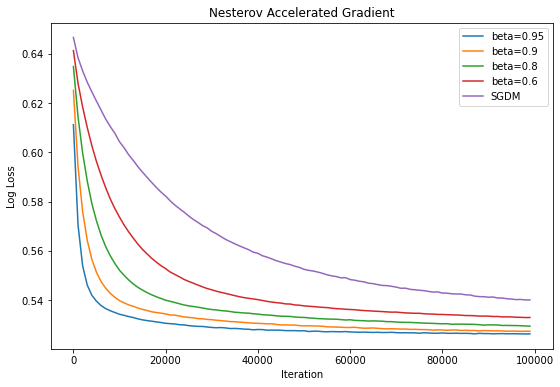

In [174]:
plt.figure(figsize=(9, 6))
plt_x = np.arange(100)*1000
plt.plot(plt_x, np.array(l_nag_256_095).reshape(-1, 1000).mean(axis=1))
plt.plot(plt_x, np.array(l_nag_256_09).reshape(-1, 1000).mean(axis=1))
plt.plot(plt_x, np.array(l_nag_256_08).reshape(-1, 1000).mean(axis=1))
plt.plot(plt_x, np.array(l_nag_256_06).reshape(-1, 1000).mean(axis=1))
plt.plot(plt_x, np.array(l_sgdm_256_095).reshape(-1, 1000)[:100].mean(axis=1))


plt.title('Nesterov Accelerated Gradient')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['beta=0.95','beta=0.9', 'beta=0.8', 'beta=0.6', 'SGDM'])
# plt.show()
plt.savefig('result_save/wine_bin_NAG.jpg', dpi=600)

# AdaGrad

In [339]:
# AdaGrad

w = np.zeros(11) #if type == 'bin' else np.zeros((1, 44*5))
record_v = w.copy()
l_list = []
r = 0
predict_list = []
print(datetime.datetime.now())
batch = 256
learning_rate = 1
for _ in range(100000):
    rand_index = random.sample(range(train_set_x.shape[0]), batch)
    data_x = train_set_x[rand_index]
    data_y = train_set_y_bin[rand_index]
    #l, g = cal_lg(np.array([data_x]), np.array([data_y]), w, 'bin')
    l, g = cal_lg(data_x, data_y, w, 'bin')
    r += np.linalg.norm(g) ** 2
    w = w - learning_rate / np.sqrt(r) * g
    if np.linalg.norm(w) > 10:
        w = w / np.linalg.norm(w) * 10
    # l_list.append(l)
    l_list.append(l_bin(train_set_x, train_set_y_bin, w))

    if _ % 10000 == 9999: print(_ // 10000, end=' ')
    if _ % 500000 == 499999: print()
print(datetime.datetime.now())

# 30s

2023-05-02 22:44:49.039910
0 1 2 3 4 5 6 7 8 9 2023-05-02 22:45:24.181110


In [8]:
import numpy as np
import matplotlib.pyplot as plt
l256 = np.load('result_save/wine_bin_MBGD_256.npy')
# np.save('result_save/wine_bin_adagrad.npy', np.array(l_list))
l_adagrad = np.load('result_save/wine_bin_adagrad.npy')

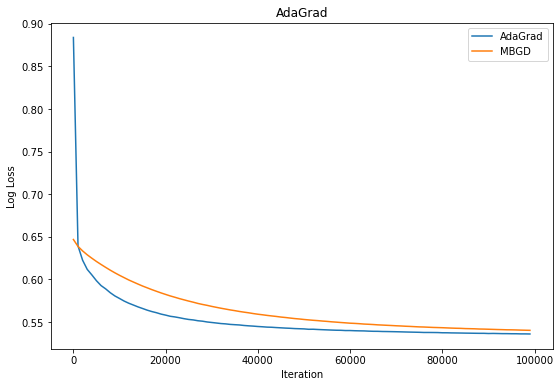

In [9]:
plt.figure(figsize=(9, 6))
plt_x = np.arange(100)*1000

plt.plot(plt_x, np.array(l_adagrad).reshape(-1, 1000).mean(axis=1))
plt.plot(plt_x, np.array(l256).reshape(-1, 1000)[:100].mean(axis=1))


plt.title('AdaGrad')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['AdaGrad','MBGD'])
# plt.show()
plt.savefig('result_save/wine_bin_AdaGrad.jpg', dpi=600)

# Adam

In [364]:
# Adam
for beta in [0.6, 0.8, 0.9, 0.95]:
    w = np.zeros(11) #if type == 'bin' else np.zeros((1, 44*5))
    record_v = w.copy()
    l_list = []
    beta1 = beta
    beta2 = beta
    m_record = w.copy()
    v_record = 0
    print(datetime.datetime.now())
    batch = 256
    learning_rate = 1e-2
    for _ in range(100000):
        rand_index = random.sample(range(train_set_x.shape[0]), batch)
        data_x = train_set_x[rand_index]
        data_y = train_set_y_bin[rand_index]
        #l, g = cal_lg(np.array([data_x]), np.array([data_y]), w, 'bin')
        l, g = cal_lg(data_x, data_y, w, 'bin')
        m = beta1 * m_record + (1 - beta1) * g
        v = beta2 * v_record + (1 - beta2) * np.linalg.norm(g) ** 2
        
        w = w - m / (1 - beta1 ** (_+1)) * learning_rate / np.sqrt(v / (1 - beta2 ** (_+1)))
        m_record = m.copy()
        v_record = v.copy()
        if np.linalg.norm(w) > 10:
            w = w / np.linalg.norm(w) * 10
        # l_list.append(l)
        l_list.append(l_bin(train_set_x, train_set_y_bin, w))

        if _ % 10000 == 9999: print(_ // 10000, end=' ')
        if _ % 500000 == 499999: print()
    print(datetime.datetime.now())
    np.save('result_save/wine_bin_adam_{}_{}.npy'.format(beta,beta), np.array(l_list))
# 30s

2023-05-02 23:00:32.521534
0 1 2 3 4 5 6 7 8 9 2023-05-02 23:01:06.088528
2023-05-02 23:01:06.100770
0 1 2 3 4 5 6 7 8 9 2023-05-02 23:01:42.125276
2023-05-02 23:01:42.142513
0 1 2 3 4 5 6 7 8 9 2023-05-02 23:02:18.880526
2023-05-02 23:02:18.893943
0 1 2 3 4 5 6 7 8 9 2023-05-02 23:02:56.822148


In [1]:
l_adam_095_095 = np.load('result_save/wine_bin_adam_0.95_0.95.npy')
l_adam_09_09 = np.load('result_save/wine_bin_adam_0.9_0.9.npy')
l_adam_08_08 = np.load('result_save/wine_bin_adam_0.8_0.8.npy')
l_adam_06_06 = np.load('result_save/wine_bin_adam_0.6_0.6.npy')

NameError: name 'np' is not defined

In [362]:
# np.save('result_save/wine_bin_adam_09_09.npy', np.array(l_list))
# np.save('result_save/wine_bin_adam_05_05.npy', np.array(l_list))
l_adam_095_095 = np.load('result_save/wine_bin_adam_095_095.npy')
l_adam_09_09 = np.load('result_save/wine_bin_adam_09_09.npy')
l_adam_08_08 = np.load('result_save/wine_bin_adam_08_08.npy')
l_adam_06_06 = np.load('result_save/wine_bin_adam_06_06.npy')

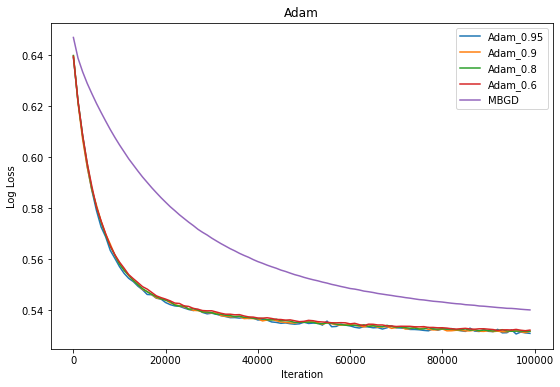

In [366]:
plt.figure(figsize=(9, 6))
plt_x = np.arange(100)*1000

plt.plot(plt_x, np.array(l_adam_095_095).reshape(-1, 1000).mean(axis=1))
plt.plot(plt_x, np.array(l_adam_09_09).reshape(-1, 1000).mean(axis=1))
plt.plot(plt_x, np.array(l_adam_08_08).reshape(-1, 1000).mean(axis=1))
plt.plot(plt_x, np.array(l_adam_06_06).reshape(-1, 1000).mean(axis=1))
plt.plot(plt_x, np.array(l256).reshape(-1, 1000)[:100].mean(axis=1))


plt.title('Adam')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['Adam_0.95','Adam_0.9','Adam_0.8','Adam_0.6','MBGD'])
# plt.show()
plt.savefig('result_save/wine_bin_Adam.jpg', dpi=600)

# Newton

In [392]:
# ONS
for epsilon in [0.1, 1, 10]:
    w = np.zeros(11) #if type == 'bin' else np.zeros((1, 44*5))
    record_v = w.copy()
    l_list = []
    # epsilon = 0.1
    A = np.eye(11) * epsilon
    A_inv = np.eye(11) / epsilon
    print(datetime.datetime.now())
    batch = 256
    learning_rate = 1e-1
    for _ in range(100000):
        rand_index = random.sample(range(train_set_x.shape[0]), batch)
        data_x = train_set_x[rand_index]
        data_y = train_set_y_bin[rand_index]
        #l, g = cal_lg(np.array([data_x]), np.array([data_y]), w, 'bin')
        l, g = cal_lg(data_x, data_y, w, 'bin')
        A = A + np.dot(g.reshape(-1,1), g.reshape(1,-1))
        A_inv = A_inv - np.dot(np.dot(A_inv, g.reshape(-1,1)), np.dot(g.reshape(1,-1), A_inv)) / (1 + np.dot(np.dot(g.reshape(1,-1), A_inv), g.reshape(-1,1)))
        
        w = w - learning_rate * np.dot(A_inv, g)
        if np.linalg.norm(w) > 10:
            w = w / np.linalg.norm(w) * 10
        # l_list.append(l)
        l_list.append(l_bin(train_set_x, train_set_y_bin, w))

        if _ % 10000 == 9999: print(_ // 10000, end=' ')
        if _ % 500000 == 499999: print()
    print(datetime.datetime.now())
    np.save('result_save/wine_bin_ons_{}.npy'.format(epsilon), np.array(l_list))

# 30s

2023-05-02 23:17:34.793247
0 1 2 3 4 5 6 7 8 9 2023-05-02 23:18:17.670752
2023-05-02 23:18:17.683921
0 1 2 3 4 5 6 7 8 9 2023-05-02 23:19:04.481255
2023-05-02 23:19:04.492871
0 1 2 3 4 5 6 7 8 9 2023-05-02 23:19:43.411569


In [10]:
l_ons_10 = np.load('result_save/wine_bin_ons_10.npy')
l_ons_1 = np.load('result_save/wine_bin_ons_1.npy')
l_ons_01 = np.load('result_save/wine_bin_ons_0.1.npy')

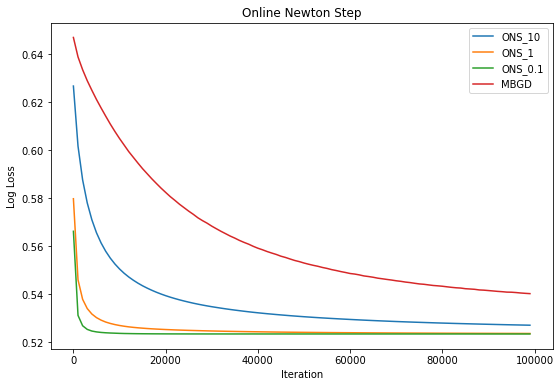

In [11]:
plt.figure(figsize=(9, 6))
plt_x = np.arange(100)*1000

plt.plot(plt_x, np.array(l_ons_10).reshape(-1, 1000).mean(axis=1))
plt.plot(plt_x, np.array(l_ons_1).reshape(-1, 1000).mean(axis=1))
plt.plot(plt_x, np.array(l_ons_01).reshape(-1, 1000).mean(axis=1))
plt.plot(plt_x, np.array(l256).reshape(-1, 1000)[:100].mean(axis=1))


plt.title('Online Newton Step')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['ONS_10', 'ONS_1', 'ONS_0.1','MBGD'])
# plt.show()
plt.savefig('result_save/wine_bin_ONS.jpg', dpi=600)

# main

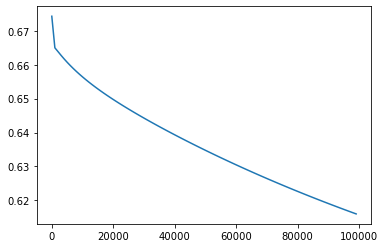

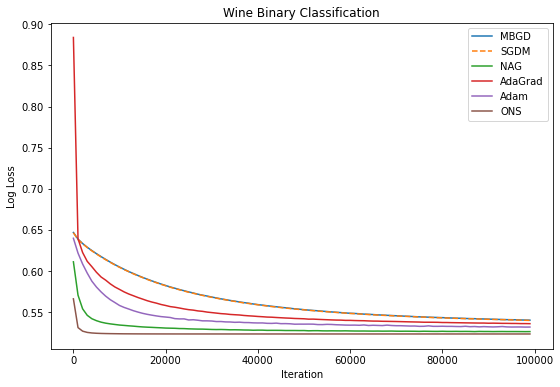

In [429]:
plt.figure(figsize=(9, 6))
plt_x = np.arange(100)*1000

# plt.plot(plt_x, np.array(l_gd3).reshape(-1, 1279).mean(axis=1)[:100])
y1, = plt.plot(plt_x, np.array(l256).reshape(-1, 1000).mean(axis=1)[:100], label='MBGD')
y2, = plt.plot(plt_x, np.array(l_sgdm_256_06).reshape(-1, 1000).mean(axis=1)[:100],'--', label='SGDM')
y3, = plt.plot(plt_x, np.array(l_nag_256_095).reshape(-1, 1000).mean(axis=1)[:100], label='NAG')
y4, = plt.plot(plt_x, np.array(l_adagrad).reshape(-1, 1000).mean(axis=1), label='AdaGrad')
y5, = plt.plot(plt_x, np.array(l_adam_08_08).reshape(-1, 1000).mean(axis=1), label='Adam')
y6, = plt.plot(plt_x, np.array(l_ons_01).reshape(-1, 1000).mean(axis=1), label='ONS')

plt.legend(handles=[y1, y2, y3, y4, y5, y6], labels=['MBGD', 'SGDM', 'NAG', 'AdaGrad', 'Adam', 'ONS'])
# for line in [y1, y2, y3, y4, y5, y6]:
#     y = line.get_ydata()[0]
#     plt.annotate(f'{line.get_label()}',
#                  xy=(0,y),
#                  xytext=(6,0),
#                  color=line.get_color(),
#                  xycoords = plt.gca().get_yaxis_transform(),
#                  textcoords="offset points",
#                  va='center')

plt.title('Wine Binary Classification')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
# plt.legend(['MBGD', 'SGDM', 'NAG', 'AdaGrad', 'Adam', 'ONS'])
# plt.show()
plt.savefig('result_save/wine_bin.jpg', dpi=600)

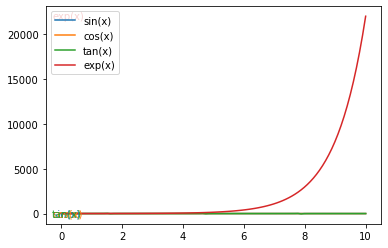

In [423]:
import matplotlib.pyplot as plt
import numpy as np

# 创建数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.exp(x)

# 绘制图像
line1, = plt.plot(x, y1, label='sin(x)')
line2, = plt.plot(x, y2, label='cos(x)')
line3, = plt.plot(x, y3, label='tan(x)')
line4, = plt.plot(x, y4, label='exp(x)')

# 添加标记
plt.legend(handles=[line1, line2, line3, line4], labels=['sin(x)', 'cos(x)', 'tan(x)', 'exp(x)'])
for line in [line1, line2, line3, line4]:
    y = line.get_ydata()[-1]
    plt.annotate(f'{line.get_label()}',
                 xy=(0,y),
                 xytext=(6,0),
                 color=line.get_color(),
                 xycoords = plt.gca().get_yaxis_transform(),
                 textcoords="offset points",
                 va='center')
    
# 显示图像
plt.show()


# mul

# GD

In [268]:
# GD
w = np.zeros(66)
l_list = []
predict_list = []
l_test = []
print(datetime.datetime.now())
for i in range(20000):
    for data_x, data_y in zip(train_set_x, train_set_y_mul):
        l, g = cal_lg(np.array(data_x).reshape(1, 11), np.array(data_y).reshape(1,), w, 'mul')
        w -= 1e-4 * g
        if np.linalg.norm(w) > 10:
            w = w /  np.linalg.norm(w) * 10
        l_list.append(l_mul(train_set_x, train_set_y_mul, w))
    if i % 20 == 0: print(i//20, end=' ')
    if i % 1000 == 999: print()
print('\n', datetime.datetime.now())

# 148min

2023-05-02 18:18:51.505147
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 
50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 
150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 
200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 
250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 26

In [284]:
# np.save('result_save/wine_mul_GD_1e-4.npy', np.array(l_list))

l_mul_gd = np.load('result_save/wine_mul_GD_1e-4.npy')

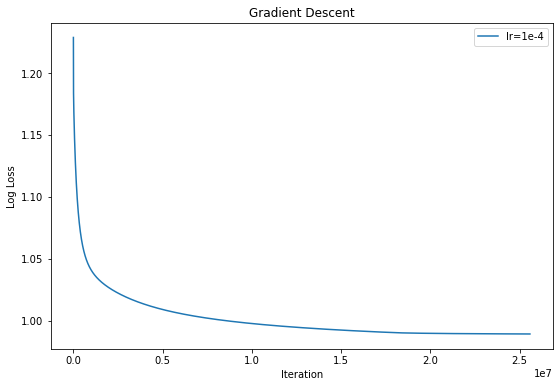

In [286]:
plt.figure(figsize=(9, 6))
plt.plot(np.array(range(len(np.array(l_mul_gd).reshape(-1, 1279).mean(axis=1))))*1279, np.array(l_mul_gd).reshape(-1, 1279).mean(axis=1))
plt.title('Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['lr=1e-4'])
# plt.show()
plt.savefig('result_save/wine_mul_GD.jpg', dpi=600)

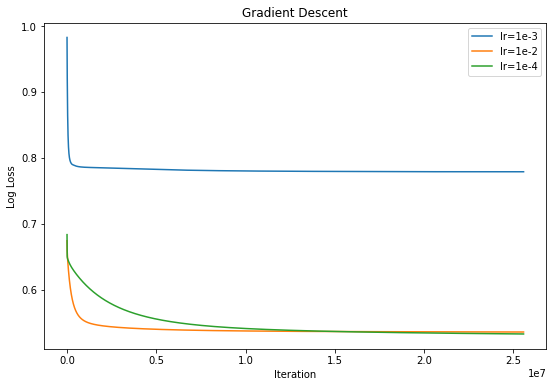

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(np.array(range(len(np.array(l_gd2).reshape(-1, 1279).mean(axis=1))))*1279, np.array(l_gd2).reshape(-1, 1279).mean(axis=1))
plt.plot(np.array(range(len(np.array(l_gd3).reshape(-1, 1279).mean(axis=1))))*1279, np.array(l_gd3).reshape(-1, 1279).mean(axis=1))
plt.plot(np.array(range(len(np.array(l_gd4).reshape(-1, 1279).mean(axis=1))))*1279, np.array(l_gd4).reshape(-1, 1279).mean(axis=1))
plt.title('Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['lr=1e-3', 'lr=1e-2', 'lr=1e-4'])
# plt.show()
plt.savefig('result_save/wine_bin_GD.jpg', dpi=600)


# MBGD

In [303]:
# MBGD
for batch_size in [16,32]:# [64, 128, 256, 512]:
    w = np.zeros(66) #if type == 'bin' else np.zeros((1, 44*5))
    l_list = []
    w_list = []
    g_list = []
    dt = datetime.datetime.now()
    print(datetime.datetime.now())
    for _ in range(400000):
        rand_index = random.sample(range(train_set_x.shape[0]), batch_size)
        data_x = train_set_x[rand_index]
        data_y = train_set_y_mul[rand_index]
        #l, g = cal_lg(np.array([data_x]), np.array([data_y]), w, 'bin')
        l, g = cal_lg(np.array(data_x), np.array(data_y), w, 'mul')
        w = w - 1e-5 * g
        if np.linalg.norm(w) > 10:
            w = w / np.linalg.norm(w) * 10
        w_list.append(w)
        g_list.append(g)
        # l_list.append(l)
        l_list.append(l_mul(train_set_x, train_set_y_mul, w))
        

        if _ % 10000 == 9999: print(_ // 10000, end=' ')
        if _ % 500000 == 499999: print()
    print(datetime.datetime.now())
    print(batch_size)
    print(datetime.datetime.now() - dt)
    np.save('result_save/wine_mul_MBGD_{}.npy'.format(batch_size), np.array(l_list))

# 16 time = 124-39 = 85s
# 32 time = 3600-57*60-19 = 85s
# 64 time = 05:31 - 02:20 = 190s
# 128 time = 11:32 - 07:20 = 250s
# 256 time = 19:20 - 13:09 = 371s
# 512 time = 30:16 - 20:47 = 569s

2023-05-02 21:31:11.602626
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 2023-05-02 21:33:48.602019
16
0:02:36.999462
2023-05-02 21:33:49.254384
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 2023-05-02 21:36:21.000816
32
0:02:31.746508


In [304]:
l_mul_MBGD_16 = np.load('result_save/wine_mul_MBGD_16.npy')
l_mul_MBGD_32 = np.load('result_save/wine_mul_MBGD_32.npy')
l_mul_MBGD_64 = np.load('result_save/wine_mul_MBGD_64.npy')
l_mul_MBGD_128 = np.load('result_save/wine_mul_MBGD_128.npy')
l_mul_MBGD_256 = np.load('result_save/wine_mul_MBGD_256.npy')
l_mul_MBGD_512 = np.load('result_save/wine_mul_MBGD_512.npy')


In [300]:
len(l_mul_MBGD_64)

400000

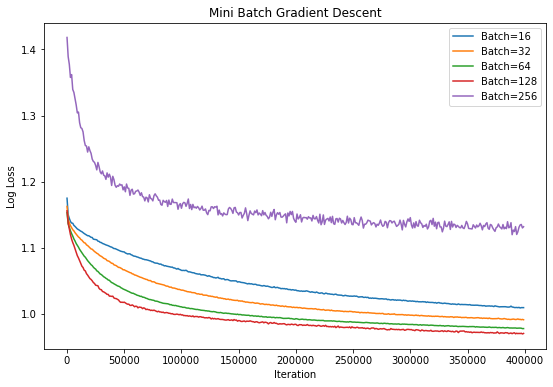

In [308]:
plt.figure(figsize=(9, 6))
# plt.plot(np.arange(len(l16[::10000]))*10000,l16[::10000])
# plt.plot(np.arange(len(l32[::10000]))*10000,l32[::10000])
# plt.plot(np.arange(len(l64[::10000]))*10000,l64[::10000])
# plt.plot(np.arange(len(l128[::10000]))*10000,l128[::10000])
# plt.plot(np.arange(len(l256[::10000]))*10000,l256[::10000])
# plt.plot(np.arange(len(l512[::10000]))*10000,l512[::10000])
plt.plot(np.arange(400)*1000,np.array(l_mul_MBGD_16).reshape(-1, 1000).mean(axis=1))
plt.plot(np.arange(400)*1000,np.array(l_mul_MBGD_32).reshape(-1, 1000).mean(axis=1))
plt.plot(np.arange(400)*1000,np.array(l_mul_MBGD_64).reshape(-1, 1000).mean(axis=1))
plt.plot(np.arange(400)*1000,np.array(l_mul_MBGD_128).reshape(-1, 1000).mean(axis=1))
plt.plot(np.arange(400)*1000,np.array(l_mul_MBGD_256).reshape(-1, 1000).mean(axis=1))
# plt.plot(np.arange(400)*1000,np.array(l_mul_MBGD_512).reshape(-1, 1000).mean(axis=1))

plt.title('Mini Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['Batch=16', 'Batch=32', 'Batch=64', 'Batch=128', 'Batch=256', 'Batch=512'])
# plt.show()
plt.savefig('result_save/wine_mul_MBGD.jpg', dpi=600)

# SGDM

In [431]:
# SGDM

w = np.zeros(66) 
record_v = w.copy()
l_list = []
v_list = []
predict_list = []
print(datetime.datetime.now())
beta = 0.8
batch = 256
learning_rate = 1e-5
for _ in range(1000000):
    rand_index = random.sample(range(train_set_x.shape[0]), batch)
    data_x = train_set_x[rand_index]
    data_y = train_set_y_mul[rand_index]
    #l, g = cal_lg(np.array([data_x]), np.array([data_y]), w, 'bin')
    l, g = cal_lg(data_x, data_y, w, 'mul')
    v = beta * record_v + (1-beta) * g
    record_v = v.copy()
    w = w - learning_rate * v
    if np.linalg.norm(w) > 10:
        w = w / np.linalg.norm(w) * 10
    # l_list.append(l)
    l_list.append(l_mul(train_set_x, train_set_y_mul, w))

    if _ % 10000 == 9999: print(_ // 10000, end=' ')
    if _ % 500000 == 499999: print()
print(datetime.datetime.now())

# 0.95 time = 30:08 - 24:23 = 345s
# 0.9 time = 13:58 - 07:25 = 393s
# 0.8 time = 343s

2023-05-03 09:04:45.553073
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 
50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
2023-05-03 09:17:08.146145


In [432]:
# np.save('result_save/wine_bin_SGDM_256_09.npy', np.array(l_list))
# np.save('result_save/wine_bin_SGDM_256_095.npy', np.array(l_list))
# np.save('result_save/wine_bin_SGDM_256_08.npy', np.array(l_list))
# np.save('result_save/wine_bin_SGDM_256_06.npy', np.array(l_list))

# l_sgdm_256_09 = np.load('result_save/wine_bin_SGDM_256_09.npy')
# l_sgdm_256_095 = np.load('result_save/wine_bin_SGDM_256_095.npy')
# l_sgdm_256_08 = np.load('result_save/wine_bin_SGDM_256_08.npy')
# l_sgdm_256_06 = np.load('result_save/wine_bin_SGDM_256_06.npy')

# np.save('result_save/wine_mul_SGDM_256_08.npy', np.array(l_list))
l_mul_sgdm_256_08 = np.load('result_save/wine_mul_SGDM_256_08.npy')

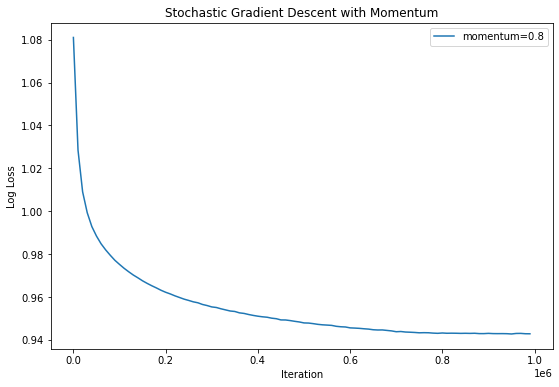

In [454]:

plt.figure(figsize=(9, 6))

plt.plot(plt_x*10, l_mul_sgdm_256_08.reshape(-1, 10000).mean(axis=1))

# plt.plot(np.arange(len(l16[::10000]))*10000,np.array(l16).reshape(-1, 10000).mean(axis=1))

plt.title('Stochastic Gradient Descent with Momentum')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['momentum=0.8'])
# plt.show()
plt.savefig('result_save/wine_mul_SGDM.jpg', dpi=600)

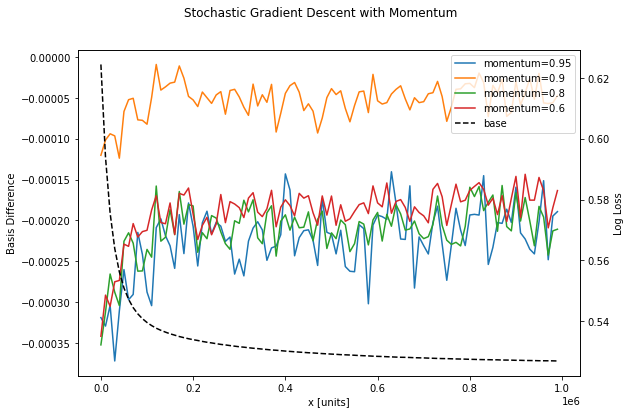

In [ ]:
fig = plt.figure(figsize=(9, 6))

base = l256
x = np.arange(100)*10000
y1 = np.array(l_sgdm_256_095-base).reshape(-1, 10000).mean(axis=1)
y2 = np.array(l_sgdm_256_09-base).reshape(-1, 10000).mean(axis=1)
y3 = np.array(l_sgdm_256_08-base).reshape(-1, 10000).mean(axis=1)
y4 = np.array(l_sgdm_256_06-base).reshape(-1, 10000).mean(axis=1)
z = np.array(l256).reshape(-1, 10000).mean(axis=1)

# plt.plot(np.arange(len(l16[::10000]))*10000,np.array(l16).reshape(-1, 10000).mean(axis=1))

fig.suptitle('Stochastic Gradient Descent with Momentum')

ax = fig.add_subplot(111)
ax.plot(x, y1, label = 'momentum=0.95')
ax.plot(x, y2, label = 'momentum=0.9')
ax.plot(x, y3, label = 'momentum=0.8')
ax.plot(x, y4, label = 'momentum=0.6')

ax2 = ax.twinx()
ax2.plot(x ,z,  label = 'base', color='black', linestyle='--')
# fig.legend(loc=1)
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

ax.set_xlabel("x [units]")
ax.set_ylabel(r"Basis Difference")
ax2.set_ylabel(r"Log Loss")


plt.savefig('result_save/wine_bin_SGDM.jpg', dpi=600)


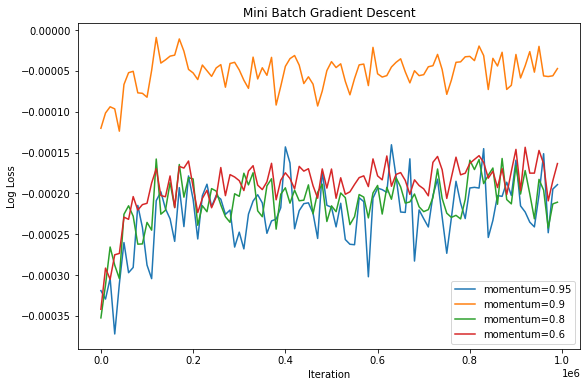

In [ ]:
plt.figure(figsize=(9, 6))

base = l256
plt.plot(np.arange(100)*10000, np.array(l_sgdm_256_095-base).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(100)*10000, np.array(l_sgdm_256_09-base).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(100)*10000, np.array(l_sgdm_256_08-base).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(100)*10000, np.array(l_sgdm_256_06-base).reshape(-1, 10000).mean(axis=1))

# plt.plot(np.arange(len(l16[::10000]))*10000,np.array(l16).reshape(-1, 10000).mean(axis=1))

plt.title('Mini Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['momentum=0.95', 'momentum=0.9', 'momentum=0.8', 'momentum=0.6'])
# plt.show()
plt.savefig('result_save/wine_bin_SGDM.jpg', dpi=600)

In [ ]:
# np.save('result_save/wine_bin_SGDM_16_09.npy', np.array(l_list))
# np.save('result_save/wine_bin_SGDM_32_09.npy', np.array(l_list))
# np.save('result_save/wine_bin_SGDM_64_09.npy', np.array(l_list))
# np.save('result_save/wine_bin_SGDM_128_09.npy', np.array(l_list))
np.save('result_save/wine_bin_SGDM_256_09.npy', np.array(l_list))
l_sgdm_16_09 = np.load('result_save/wine_bin_SGDM_16_09.npy')
l_sgdm_32_09 = np.load('result_save/wine_bin_SGDM_32_09.npy')
l_sgdm_64_09 = np.load('result_save/wine_bin_SGDM_64_09.npy')
l_sgdm_128_09 = np.load('result_save/wine_bin_SGDM_128_09.npy')
l_sgdm_256_09 = np.load('result_save/wine_bin_SGDM_256_09.npy')

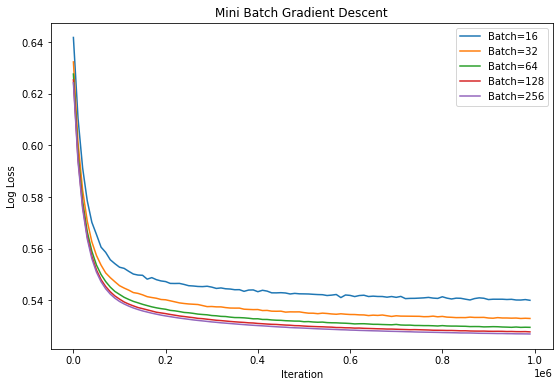

In [ ]:
plt.figure(figsize=(9, 6))

plt.plot(np.arange(len(l_sgdm_16_09[::10000]))*10000,np.array(l_sgdm_16_09).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(len(l_sgdm_32_09[::10000]))*10000,np.array(l_sgdm_32_09).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(len(l_sgdm_64_09[::10000]))*10000,np.array(l_sgdm_64_09).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(len(l_sgdm_128_09[::10000]))*10000,np.array(l_sgdm_128_09).reshape(-1, 10000).mean(axis=1))
plt.plot(np.arange(len(l_sgdm_256_09[::10000]))*10000,np.array(l_sgdm_256_09).reshape(-1, 10000).mean(axis=1))
# plt.plot(np.arange(len(l16[::10000]))*10000,np.array(l16).reshape(-1, 10000).mean(axis=1))

plt.title('Mini Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['Batch=16','Batch=32', 'Batch=64', 'Batch=128', 'Batch=256', 'Batch=512'])
# plt.show()
plt.savefig('result_save/wine_bin_SGDM.jpg', dpi=600)

# NAG

In [451]:
# NAG

w = np.zeros(66) #if type == 'bin' else np.zeros((1, 44*5))
record_v = w.copy()
l_list = []
v_list = []
predict_list = []
print(datetime.datetime.now())
beta = 0.95
batch = 256
learning_rate = 1e-6
for _ in range(500000):
    rand_index = random.sample(range(train_set_x.shape[0]), batch)
    data_x = train_set_x[rand_index]
    data_y = train_set_y_mul[rand_index]
    #l, g = cal_lg(np.array([data_x]), np.array([data_y]), w, 'bin')
    l, g = cal_lg(data_x, data_y, w - beta * record_v, 'mul')
    v = beta * record_v + learning_rate * g
    record_v = v.copy()
    w = w -  v
    if np.linalg.norm(w) > 10:
        w = w / np.linalg.norm(w) * 10
    # l_list.append(l)
    l_list.append(l_mul(train_set_x, train_set_y_mul, w))

    if _ % 10000 == 9999: print(_ // 10000, end=' ')
    if _ % 500000 == 499999: print()
print(datetime.datetime.now())

# 30s

2023-05-03 09:33:50.612367
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 
2023-05-03 09:39:36.751746


In [461]:
# np.save('result_save/wine_bin_nag_256_095.npy', np.array(l_list))
# np.save('result_save/wine_bin_nag_256_09.npy', np.array(l_list))
# np.save('result_save/wine_bin_nag_256_08.npy', np.array(l_list))
# np.save('result_save/wine_bin_nag_256_06.npy', np.array(l_list))

# l_nag_256_095 = np.load('result_save/wine_bin_nag_256_095.npy')
# l_nag_256_09 = np.load('result_save/wine_bin_nag_256_09.npy')
# l_nag_256_08 = np.load('result_save/wine_bin_nag_256_08.npy')
# l_nag_256_06 = np.load('result_save/wine_bin_nag_256_06.npy')

# np.save('result_save/wine_mul_nag_256_095.npy', np.array(l_list))
l_mul_nag_256_095 = np.load('result_save/wine_mul_nag_256_095.npy')

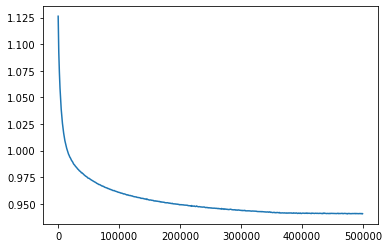

In [462]:
# plt.plot(plt_x, np.array(l_mul_nag_256_095).reshape(-1, 1000).mean(axis=1))

plt.plot(np.arange(500)*1000, np.array(l_mul_nag_256_095).reshape(-1, 1000).mean(axis=1))

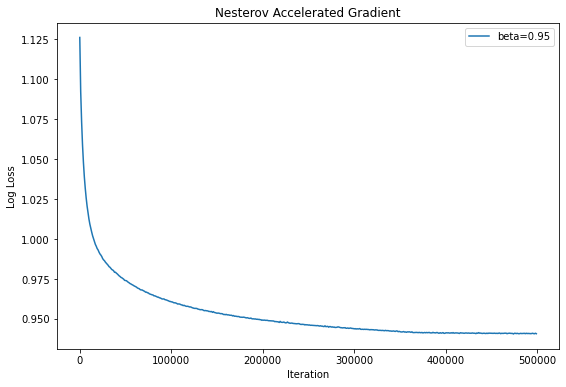

In [463]:
plt.figure(figsize=(9, 6))
plt.plot(np.arange(500)*1000, np.array(l_mul_nag_256_095).reshape(-1, 1000).mean(axis=1))


plt.title('Nesterov Accelerated Gradient')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['beta=0.95'])
# plt.show()
plt.savefig('result_save/wine_mul_NAG.jpg', dpi=600)

# AdaGrad

In [467]:
# AdaGrad

w = np.zeros(66) #if type == 'bin' else np.zeros((1, 44*5))
record_v = w.copy()
l_list = []
r = 0
predict_list = []
print(datetime.datetime.now())
batch = 256
learning_rate = 1
for _ in range(500000):
    rand_index = random.sample(range(train_set_x.shape[0]), batch)
    data_x = train_set_x[rand_index]
    data_y = train_set_y_mul[rand_index]
    #l, g = cal_lg(np.array([data_x]), np.array([data_y]), w, 'bin')
    l, g = cal_lg(data_x, data_y, w, 'mul')
    r += np.linalg.norm(g) ** 2
    w = w - learning_rate / np.sqrt(r) * g
    if np.linalg.norm(w) > 10:
        w = w / np.linalg.norm(w) * 10
    # l_list.append(l)
    l_list.append(l_mul(train_set_x, train_set_y_mul, w))

    if _ % 10000 == 9999: print(_ // 10000, end=' ')
    if _ % 500000 == 499999: print()
print(datetime.datetime.now())

# 30s

2023-05-03 09:46:33.388847
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 
2023-05-03 09:52:13.442714


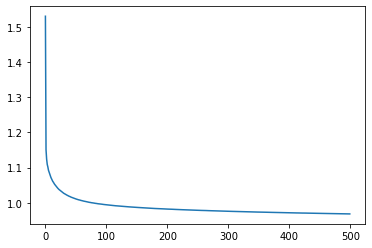

In [468]:
plt.plot(np.array(l_list).reshape(-1, 1000).mean(axis=1))

In [469]:
# np.save('result_save/wine_mul_adagrad.npy', np.array(l_list))
l_mul_adagrad = np.load('result_save/wine_mul_adagrad.npy')

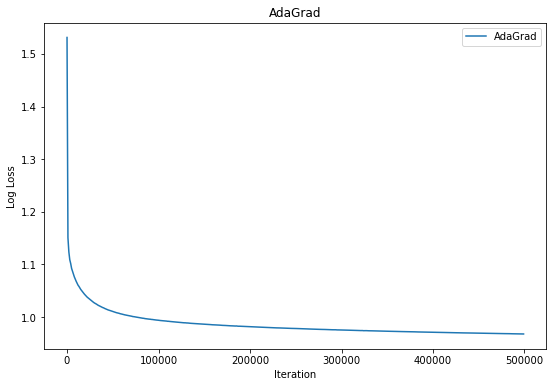

In [472]:
plt.figure(figsize=(9, 6))
# plt_x = np.arange(100)*1000

plt.plot(np.arange(500)*1000, np.array(l_mul_adagrad).reshape(-1, 1000).mean(axis=1))
# plt.plot(plt_x, np.array(l256).reshape(-1, 1000)[:100].mean(axis=1))


plt.title('AdaGrad')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['AdaGrad','MBGD'])
# plt.show()
plt.savefig('result_save/wine_mul_AdaGrad.jpg', dpi=600)

# Adam

In [557]:
# Adam
# for beta in [0.6, 0.8, 0.9, 0.95]:
w = np.zeros(66) #if type == 'bin' else np.zeros((1, 44*5))
record_v = w.copy()
l_list = []
beta1 = 0.8
beta2 = 0.8
m_record = w.copy()
v_record = 0
g_list, mm_list = [], []
print(datetime.datetime.now())
batch = 256
learning_rate = 1e-2
for _ in range(100000):
    rand_index = random.sample(range(train_set_x.shape[0]), batch)
    data_x = train_set_x[rand_index]
    data_y = train_set_y_mul[rand_index]
    #l, g = cal_lg(np.array([data_x]), np.array([data_y]), w, 'bin')
    l, g = cal_lg(data_x, data_y, w, 'mul')
    m = beta1 * m_record + (1 - beta1) * g
    v = beta2 * v_record + (1 - beta2) * np.linalg.norm(g) ** 2
    
    w = w - m / (1 - beta1 ** (_+1)) * learning_rate / np.sqrt(v / (1 - beta2 ** (_+1)))
    g_list.append(g)
    mm_list.append(m / (1 - beta1 ** (_+1)) * learning_rate / np.sqrt(v / (1 - beta2 ** (_+1))))
    m_record = m.copy()
    v_record = v.copy()
    if np.linalg.norm(w) > 10:
        w = w / np.linalg.norm(w) * 10
    # l_list.append(l)
    l_list.append(l_mul(train_set_x, train_set_y_mul, w))

    if _ % 10000 == 9999: print(_ // 10000, end=' ')
    if _ % 500000 == 499999: print()
print(datetime.datetime.now())
    # np.save('result_save/wine_bin_adam_{}_{}.npy'.format(beta,beta), np.array(l_list))
# 30s

2023-05-03 12:13:08.383449
2023-05-03 12:13:09.252949


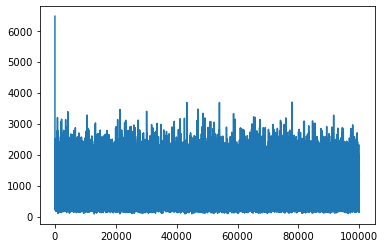

In [552]:
plt.plot([np.linalg.norm(i) for i in g_list])

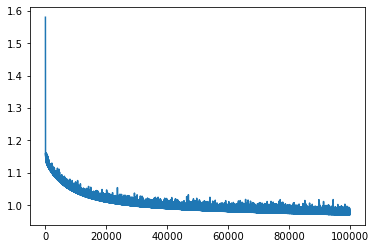

In [553]:
plt.plot([np.linalg.norm(i) for i in l_list])

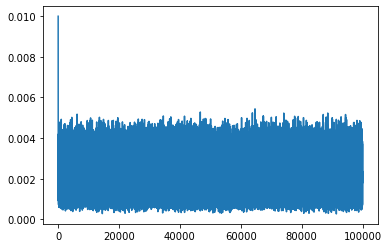

In [554]:
plt.plot([np.linalg.norm(i) for i in mm_list])

In [476]:
# np.save('result_save/wine_mul_adam_08_08.npy', np.array(l_list))
l_mul_adam_08_08 = np.load('result_save/wine_mul_adam_08_08.npy')


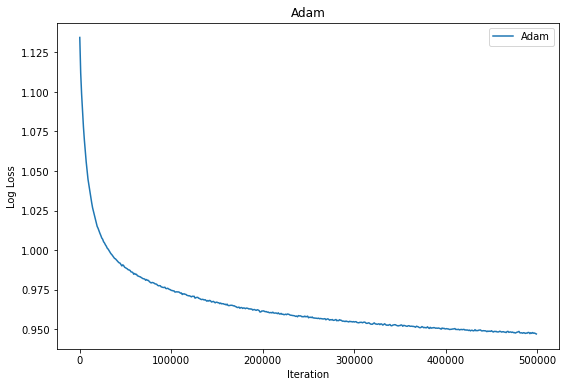

In [478]:
plt.figure(figsize=(9, 6))
plt.plot(np.arange(500)*1000, np.array(l_mul_adam_08_08).reshape(-1, 1000).mean(axis=1))


plt.title('Adam')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['Adam'])
# plt.show()
plt.savefig('result_save/wine_mul_Adam.jpg', dpi=600)

# Newton

In [586]:
# ONS
ss = 0
for epsilon in [0.1]:
    w = np.zeros(66) #if type == 'bin' else np.zeros((1, 44*5))
    record_v = w.copy()
    l_list = []
    g_list = []
    v_list = []
    # epsilon = 0.1
    A = np.eye(66) * epsilon
    A_inv = np.eye(66) / epsilon
    print(datetime.datetime.now())
    batch = 32
    learning_rate = 1
    for _ in range(500000):
        rand_index = random.sample(range(train_set_x.shape[0]), batch)
        data_x = train_set_x[rand_index]
        data_y = train_set_y_mul[rand_index]
        #l, g = cal_lg(np.array([data_x]), np.array([data_y]), w, 'bin')
        l, g = cal_lg(data_x, data_y, w, 'mul')
        A = A + np.dot(g.reshape(-1,1), g.reshape(1,-1))
        A_inv = np.linalg.inv(A)
        # A_inv = A_inv - np.dot(np.dot(A_inv, g.reshape(-1,1)), np.dot(g.reshape(1,-1), A_inv)) / (1 + np.dot(np.dot(g.reshape(1,-1), A_inv), g.reshape(-1,1)))
        v = learning_rate * np.dot(A_inv, g)
        w = w - v
        g_list.append(g)
        v_list.append(v)
        if np.linalg.norm(w) > 10:
            w = w / np.linalg.norm(w) * 10
            ss += 1
        # l_list.append(l)
        l_list.append(l_mul(train_set_x, train_set_y_mul, w))

        if _ % 10000 == 9999: print(_ // 10000, end=' ')
        if _ % 500000 == 499999: print()
    print(datetime.datetime.now())
    np.save('result_save/wine_mul_ons_{}.npy'.format(epsilon), np.array(l_list))

# 30s

2023-05-03 14:05:16.045035
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 
2023-05-03 14:09:47.782149


In [588]:
# np.save('result_save/wine_mul_ons_01.npy', np.array(l_list))
l_mul_ons_01 = np.load('result_save/wine_mul_ons_01.npy')

In [591]:
len(l_mul_ons_01), len(l_mul_MBGD_32)

(500000, 400000)

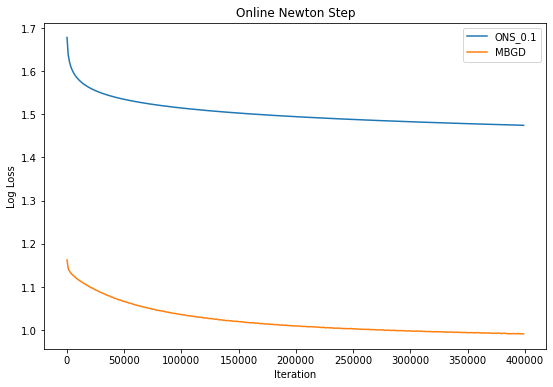

In [595]:
plt.figure(figsize=(9, 6))
plt_x = np.arange(400)*1000

plt.plot(plt_x, np.array(l_mul_ons_01).reshape(-1, 1000).mean(axis=1)[:400])
plt.plot(plt_x, np.array(l_mul_MBGD_32).reshape(-1, 1000).mean(axis=1))


plt.title('Online Newton Step')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend(['ONS_0.1','MBGD'])
# plt.show()
plt.savefig('result_save/wine_mul_ONS.jpg', dpi=600)

# main

In [13]:
l_mul_MBGD_128 = np.load('result_save/wine_mul_MBGD_128.npy')
l_mul_sgdm_256_08 = np.load('result_save/wine_mul_sgdm_256_08.npy')
l_mul_nag_256_095 = np.load('result_save/wine_mul_nag_256_095.npy')
l_mul_adagrad = np.load('result_save/wine_mul_adagrad.npy')
l_mul_adam_08_08 = np.load('result_save/wine_mul_adam_08_08.npy')

In [599]:
len(l_mul_sgdm_256_08), len(l_mul_adam_08_08)

(1000000, 500000)

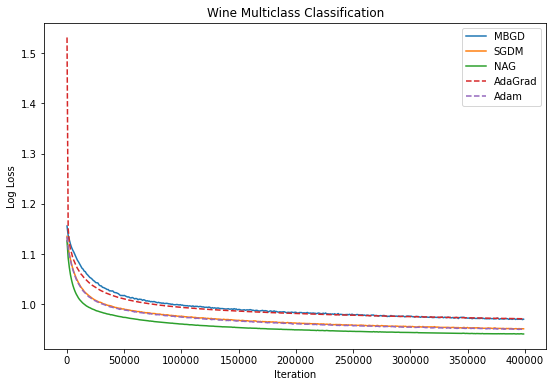

In [14]:
plt.figure(figsize=(9, 6))
plt_x = np.arange(400)*1000

# plt.plot(plt_x, np.array(l_gd3).reshape(-1, 1279).mean(axis=1)[:100])
y1, = plt.plot(plt_x, np.array(l_mul_MBGD_128).reshape(-1, 1000).mean(axis=1), label='MBGD')
y2, = plt.plot(plt_x, np.array(l_mul_sgdm_256_08).reshape(-1, 1000).mean(axis=1)[:400], label='SGDM')
y3, = plt.plot(plt_x, np.array(l_mul_nag_256_095).reshape(-1, 1000).mean(axis=1)[:400], label='NAG')
y4, = plt.plot(plt_x, np.array(l_mul_adagrad).reshape(-1, 1000).mean(axis=1)[:400], '--', label='AdaGrad')
y5, = plt.plot(plt_x, np.array(l_mul_adam_08_08).reshape(-1, 1000).mean(axis=1)[:400], '--', label='Adam')
# y6, = plt.plot(plt_x, np.array(l_ons_01).reshape(-1, 1000).mean(axis=1), label='ONS')


# plt.plot(plt_x, l_mul_sgdm_256_08.reshape(-1, 1000).mean(axis=1))
# plt.plot(np.arange(500)*1000, np.array(l_mul_nag_256_095).reshape(-1, 1000).mean(axis=1))
# plt.plot(np.arange(500)*1000, np.array(l_mul_adagrad).reshape(-1, 1000).mean(axis=1))
# plt.plot(np.arange(500)*1000, np.array(l_mul_adam_08_08).reshape(-1, 1000).mean(axis=1))


plt.legend(handles=[y1, y2, y3, y4, y5], labels=['MBGD', 'SGDM', 'NAG', 'AdaGrad', 'Adam'])
# for line in [y1, y2, y3, y4, y5, y6]:
#     y = line.get_ydata()[0]
#     plt.annotate(f'{line.get_label()}',
#                  xy=(0,y),
#                  xytext=(6,0),
#                  color=line.get_color(),
#                  xycoords = plt.gca().get_yaxis_transform(),
#                  textcoords="offset points",
#                  va='center')

plt.title('Wine Multiclass Classification')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
# plt.legend(['MBGD', 'SGDM', 'NAG', 'AdaGrad', 'Adam', 'ONS'])
# plt.show()
plt.savefig('result_save/wine_mul.jpg', dpi=600)

ValueError: `bins` must increase monotonically, when an array

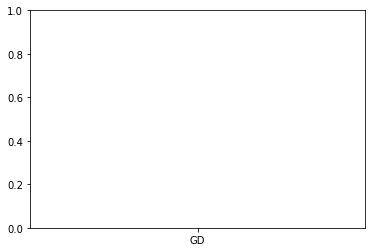

In [15]:
import matplotlib.pyplot as plt
plt.hist(['GD', 'MBGD_32','MBGD_256', 'SGDM', 'NAG','AdaGrad','Adam','ONS'],[8.991, 8.5,37.1,34.5,30.3,36.0, 34.2,43.7])

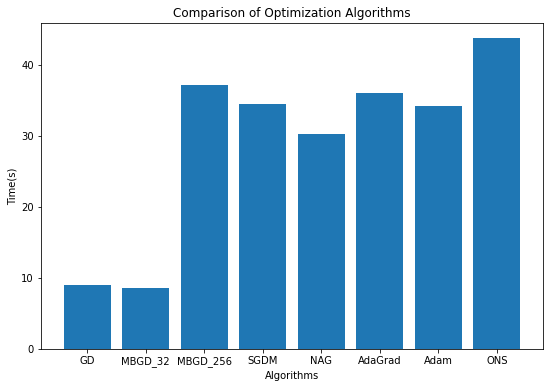

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
# 数据
x = ['GD', 'MBGD_32', 'MBGD_256', 'SGDM', 'NAG', 'AdaGrad', 'Adam', 'ONS']
y = [8.991, 8.5, 37.1, 34.5, 30.3, 36.0, 34.2, 43.7]

# 生成柱状图
plt.bar(x, y)

# 添加标题和标签
plt.title('Comparison of Optimization Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Time(s)')

# 显示图形
plt.show()


In [20]:
l_gd3 = np.load('result_save/wine_bin_GD_1e-3.npy')

In [44]:
# l_gd3.reshape(-1,1279).mean(axis=1)[261]
l_gd3.reshape(-1,1279).mean(axis=1)[131]

0.6063837925348615

In [45]:
# np.array(l32).reshape(-1, 1000).mean(axis=1)[352]
np.array(l32).reshape(-1, 1000).mean(axis=1)[176]

0.5413899632578794

In [46]:
# np.array(l256).reshape(-1, 1000).mean(axis=1)[80]
np.array(l256).reshape(-1, 1000).mean(axis=1)[40]

0.5591333909602311

In [62]:
np.array(l_sgdm_256_06).reshape(-1, 1000).mean(axis=1)[86],np.array(l_sgdm_256_06).reshape(-1, 1000).mean(axis=1)[43]

(0.5418516504557433, 0.5567600023488203)

In [48]:
# np.array(l_nag_256_095).reshape(-1, 1000).mean(axis=1)[99]
np.array(l_nag_256_095).reshape(-1, 1000).mean(axis=1)[49]

0.5275495979436841

In [49]:
# np.array(l_adagrad).reshape(-1, 1000).mean(axis=1)[83]
np.array(l_adagrad).reshape(-1, 1000).mean(axis=1)[42]

0.5439902110062926

In [50]:
# np.array(l_adam_08_08).reshape(-1, 1000).mean(axis=1)[87]
np.array(l_adam_08_08).reshape(-1, 1000).mean(axis=1)[44]

0.5707411886576983

In [51]:
# np.array(l_ons_01).reshape(-1, 1000).mean(axis=1)[69]
np.array(l_ons_01).reshape(-1, 1000).mean(axis=1)[35]

0.5234310591685999

In [41]:
l_adam_08_08 = np.load('result_save/wine_bin_adam_08_08.npy')
l_ons_01 = np.load('result_save/wine_bin_ons_0.1.npy')

In [ ]:
x = ['GD', 'MBGD_32', 'MBGD_256', 'SGDM', 'NAG', 'AdaGrad', 'Adam', 'ONS']
y1 = [8.991, 8.5,        37.1,        34.5, 30.3,    36.0, 34.2, 43.7]
y2 = [0.580790151622574, 0.5372721624106055, 0.5433004731272966, 0.5418516504557433,
      0.526325540444909, 0.5372721624106055, 0.5498337233686501, 0.5234281582134429]
y3 = [0.6063837925348615,0.5591333909602311,0.5567600023488203,0.5275495979436841,
      0.5413899632578794,0.5439902110062926,0.5707411886576983,0.5234310591685999]

In [ ]:

np.array(l_adam_08_08).reshape(-1, 1000).mean(axis=1)
np.array(l_ons_01).reshape(-1, 1000).mean(axis=1)

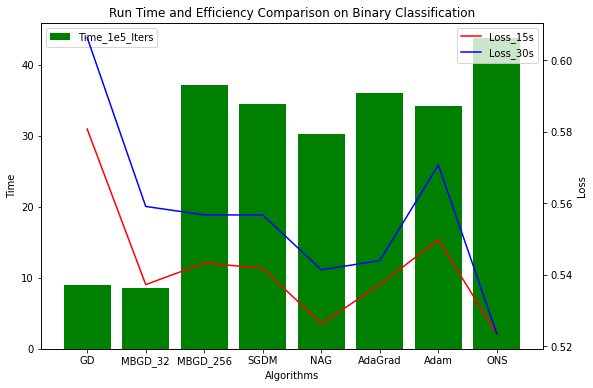

In [71]:
import matplotlib.pyplot as plt


# 设置x轴和y轴数据
x = ['GD', 'MBGD_32', 'MBGD_256', 'SGDM', 'NAG', 'AdaGrad', 'Adam', 'ONS']
y1 = [8.991, 8.5, 37.1, 34.5, 30.3, 36.0, 34.2, 43.7]
y2 = [0.580790151622574, 0.5372721624106055, 0.5433004731272966, 0.5418516504557433,
      0.526325540444909, 0.5372721624106055, 0.5498337233686501, 0.5234281582134429]
y3 = [0.6063837925348615, 0.5591333909602311, 0.5567600023488203, 0.5567600023488203,
      0.5413899632578794, 0.5439902110062926, 0.5707411886576983, 0.5234310591685999]

# 创建画布和坐标轴对象
fig, ax1 = plt.subplots(figsize = (9, 6)
)

# 绘制柱状图
ax1.bar(x, y1, label='Time_1e5_Iters', color='green')

# 添加坐标轴标签和标题
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Time')
ax1.set_title('Run Time and Efficiency Comparison on Binary Classification')

# 添加图例
ax1.legend()

# 添加第二个坐标轴
ax2 = ax1.twinx()

# 绘制第一个折线图
ax2.plot(x, y2, label='Loss_15s', color='red')

# 绘制第二个折线图
ax2.plot(x, y3, label='Loss_30s', color='blue')

# 添加第二个坐标轴的标签
ax2.set_ylabel('Loss')

# 添加第二个图例
ax2.legend(loc='upper right')

# 显示图形


plt.savefig('result_save/wine_bin_time.jpg', dpi=600)